In [2]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
token = '4e6e771d37dbcbcfcc3b53d291a274d3ae21560a2e81f058a7c177aff044b5141941e89aff1fead50be4f'

In [3]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [4]:
vk.messages.send(
    chat_id=1,
    random_id=2,
    message='Matrix has you ...')

0

In [5]:
df = pd.read_csv('/home/jupyter-an.karpov/shared/ads_data.csv.zip', compression='zip')

In [6]:
ad_data = df.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'user_id': 'count'})

In [7]:
ad_data = ad_data.pivot(index='ad_id', columns='event', values='user_id').reset_index()

In [8]:
ad_data = ad_data.fillna(0).assign(ctr=ad_data.click / ad_data.view)

In [9]:
top_ctr = ad_data.query('click > 20 & view > 100').sort_values('ctr').tail(10)

In [10]:
top_ctr.to_csv('top_ctr_data.csv', index=False)

In [11]:
path = '/home/jupyter-an.karpov/lesson_7/top_ctr_data.csv'
file_name = 'top_ctr_data.csv'

path_to_file = path
upload_url = vk.docs.getMessagesUploadServer(peer_id=2000000001)["upload_url"]
file = {'file': (file_name, open(path_to_file, 'rb'))}

response = requests.post(upload_url, files=file)

json_data = json.loads(response.text)
json_data

{'file': '591438330|0|-1|856324|18a983d0b7|csv|403|top_ctr_data.csv|c2f9e346fc49058f43500d24dbf7ae44|844363341001fa9065f1f71631e3878c||||eyJkaXNrIjoiNyIsInBlZXJfc2VuZGVyIjoiLTE5NjA5OTUyOCJ9'}

In [12]:
saved_file = vk.docs.save(file=json_data['file'], title=file_name)

In [13]:
saved_file

{'type': 'doc',
 'doc': {'id': 555175609,
  'owner_id': 591438330,
  'title': 'top_ctr_data.csv',
  'size': 403,
  'ext': 'csv',
  'date': 1592214057,
  'type': 1,
  'url': 'https://vk.com/doc591438330_555175609?hash=f5e049dfcd9237bef6&dl=FUYTSNRQHE4TKMRY:1592214057:fde24a49275516c989&api=1&no_preview=1'}}

In [14]:
attachment = 'doc{}_{}'.format(saved_file['doc']['owner_id'], saved_file['doc']['id'])

In [15]:
attachment

'doc591438330_555175609'

In [16]:
vk.messages.send(
    chat_id=1,
    random_id=3,
    message='Топ объявлений по CTR', 
    attachment = attachment
)

0

In [48]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [59]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'anatoly1804@gmail.com'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name('heroic-venture-268009-1dfbcc34e5fa.json', scope)
gs = gspread.authorize(credentials)

In [60]:
# Name of the table in google sheets, 
# can be url for open_by_url
# or id (key) part for open_by_key
table_name = 'to_sequence'  # Your table
# Get this table
work_sheet = gs.open(table_name)

In [72]:
# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

In [73]:
data

[['price', 'group'],
 ['110', 'Group_1'],
 ['20', 'Group_2'],
 ['250', 'group_3'],
 ['500', 'group_4']]

In [74]:
headers = data.pop(0)

In [75]:
df = pd.DataFrame(data, columns=headers)

In [76]:
df

,price,group
0,110,Group_1
1,20,Group_2
2,250,group_3
3,500,group_4


In [67]:
df.sort_values('price', ascending=False)

,price,group
1,20,Group_2
0,110,Group_1


In [71]:
sheet1.append_row([500, 'group_4'])

{'spreadsheetId': '1gjyC_l8LMR3xq6h9w0GlbfsCpjl_V1j3dl9_0WxYyq8',
 'tableRange': "'Лист1'!A1:B4",
 'updates': {'spreadsheetId': '1gjyC_l8LMR3xq6h9w0GlbfsCpjl_V1j3dl9_0WxYyq8',
  'updatedRange': "'Лист1'!A5:B5",
  'updatedRows': 1,
  'updatedColumns': 2,
  'updatedCells': 2}}

In [77]:
# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
spreadsheet_name = 'A new spreadsheet'
sheet = 'KarpovCorses2'
d2g.upload(df, spreadsheet_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'KarpovCorses2' id:1323350636>

In [84]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'
visits = 'metrics=ym:s:visits&dimensions=ym:s:date&id=44147844'

In [85]:
vistis_url = url + visits

In [86]:
vistis_request = requests.get(vistis_url)

In [87]:
vistis_request

<Response [200]>

In [88]:
json_data = json.loads(vistis_request.text)

In [90]:
json_data['data']

[{'dimensions': [{'name': '2020-06-05'}], 'metrics': [718.0]},
 {'dimensions': [{'name': '2020-06-02'}], 'metrics': [644.0]},
 {'dimensions': [{'name': '2020-06-03'}], 'metrics': [633.0]},
 {'dimensions': [{'name': '2020-06-04'}], 'metrics': [606.0]},
 {'dimensions': [{'name': '2020-06-01'}], 'metrics': [572.0]},
 {'dimensions': [{'name': '2020-06-06'}], 'metrics': [375.0]},
 {'dimensions': [{'name': '2020-06-07'}], 'metrics': [176.0]}]

In [95]:
y_df = pd.DataFrame([(i['dimensions'][0]['name'], 
  i['metrics'][0]) for i in json_data['data']], columns=['date', 
                                                        'visits'])

In [96]:
spreadsheet_name = 'A new spreadsheet'
sheet = 'Yandex_visits'
d2g.upload(y_df, spreadsheet_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Yandex_visits' id:197715693>

# ДЗ

Загрузите данные из Google Sheets, которые находятся по этой https://docs.google.com/spreadsheets/d/1e3PRXmMNXo9AZZnaol1aHgYxtH6KYaCDymEQlK6jaO8/export?format=csv при помощи библиотеки requests. Посчитайте процент мужчин среди всех посетителей сайта, округлите ответ до целых.

In [4]:
from io import BytesIO
import requests


req = requests.get('https://docs.google.com/spreadsheets/d/1e3PRXmMNXo9AZZnaol1aHgYxtH6KYaCDymEQlK6jaO8/export?format=csv')
data = req.content

df = pd.read_csv(BytesIO(data))

In [5]:
df.head()

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


In [7]:
df

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


In [12]:
df.query("gender =='male'")['users']/df['users'].sum()

1    0.40625
Name: users, dtype: float64

In [27]:
data = pd.read_csv('data_lessons/karpov_courses_test.csv', sep = ',')

In [16]:
data.head()

,date,browser,user_type,users
0,2020-06-14,Google Chrome,People,139
1,2020-06-14,Chrome Mobile,People,35
2,2020-06-14,Google Chrome,Robots,28
3,2020-06-14,Yandex Browser,People,22
4,2020-06-14,Firefox,People,15


In [23]:
import numpy as np

In [29]:
data.user_type == 'Robots'

0     False
1     False
2      True
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20    False
21     True
22    False
23    False
Name: user_type, dtype: bool

In [30]:
chrome_robots = pd.Series(np.where( (data.browser.str.contains('Chrome'))
                            &(data.user_type == 'Robots'),1,0))

In [24]:
np.where(data.browser.str.contains('Chrome'),1,0)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [19]:
data['browser'].iloc[0].contains('Chrome')
# .str.contains('Chrome')

'Google Chrome'

In [31]:
data = pd.read_csv('data_lessons/sample_ads.csv', sep = ',')

In [32]:
data.head()

,ad_id,user_id,click_type
0,12345,qwert,top
1,12345,fsssc,center
2,12345,vfvgg,NaN
3,12345,asrvv,NaN
4,12345,tynuy,top


In [38]:
data.head()

,ad_id,user_id,click_type
0,12345,qwert,top
1,12345,fsssc,center
2,12345,vfvgg,NaN
3,12345,asrvv,NaN
4,12345,tynuy,top


In [36]:
data.click_type.isna().sum()

7

# ДЗ 2

In [44]:
data = pd.read_csv('data_lessons/step_1_lesson_7.csv', sep = ',')

In [45]:
data.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


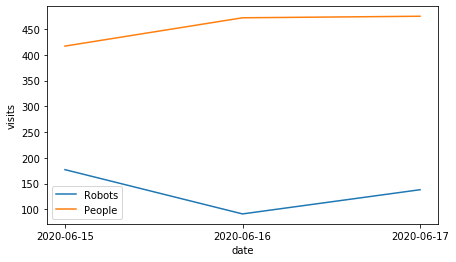

In [62]:
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4))
r = ['Robots','People']
for i in r:
    l = i
    df1=data.query("user_type in @l")
    sns.lineplot(x=df1.date, y=pd.DataFrame(df1).visits, label = str(i))
#     , label = f'{r[i]}'

In [63]:
data = pd.read_csv('data_lessons/step_2_lesson_7.csv', sep = ',')

In [64]:
data.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [72]:
a = data.groupby(['browser'], as_index = False).agg({'visits':'sum'})
a.query("browser == 'Google Chrome'")['visits']/a['visits'].sum()

6    0.59596
Name: visits, dtype: float64

In [73]:
data = pd.read_csv('data_lessons/step_3_lesson_7.csv', sep = ',')

In [74]:
data.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [84]:
a = data.groupby(['browser', 'user_type'], as_index = False).agg({'visits':'sum'})
b = a.groupby(['browser'], as_index = False).agg({'visits':'sum'})
df = a.merge(b, on = 'browser')
df['per'] = df['visits_x']/df['visits_y']
df.query("user_type == 'Robots'").sort_values('per', ascending = False)

,browser,user_type,visits_x,visits_y,per
19,UCWEB,Robots,4.0,4.0,1.000000
16,Safari,Robots,22.0,41.0,0.536585
8,Firefox,Robots,31.0,58.0,0.534483
3,Chromium,Robots,1.0,2.0,0.500000
14,Opera,Robots,5.0,16.0,0.312500
10,Google Chrome,Robots,104.0,354.0,0.293785
6,Edge,Robots,1.0,5.0,0.200000
22,Yandex Browser,Robots,7.0,54.0,0.129630
18,Samsung Internet,Robots,1.0,9.0,0.111111
12,Mobile Safari,Robots,1.0,16.0,0.062500


In [85]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [86]:
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [ ]:
#gspread - библиотека для работы с гугл диском

# ДЗ 3 чистка данных

Алгоритм решения:
- Определяем в каких строках нет текста
- по индексам строк дробим таблицу на части
- каждую часть приводим к 7 нужным столбцам
- схлопываем

In [88]:
data = pd.read_excel('data_lessons/tables.xlsx')

In [261]:
#Определяем в каких строках нет текста
%timeit
indexes = []
columns = []
for i in range(len(data)):
    if i == 0:
        indexes.append(0)
        columns.append(data.columns)
    if i == len(data)-1:
        indexes.append(len(data))
    try:
        data.iloc[i].sum()
    except:   
        columns.append(list(data.iloc[i]))
        indexes.append(data.iloc[i].name-1)
        indexes.append(data.iloc[i].name+1)

#в этом примере нет всего одной строки с числовыми значениями, но если бы были - индекс дублировался бы, поэтому:
index_itog = list(pd.DataFrame(indexes, columns = ['i_'])['i_'].drop_duplicates())
#разобьем лист с индексами на листы по 2 объекта
n = 2
itog_i = [index_itog[i:i + n] for i in range(0, len(index_itog), n)]

In [246]:
dataframes = []
#делим датафрейм на куски и присваиваем столбцы, которые мы отловили в список columns:
for i in range(len(itog_i)):
    if i < len(itog_i)-1:
        a = data.iloc[itog_i[i][0]:itog_i[i][1]+1]
        a.columns = list(columns[i])
        dataframes.append(a)
    else:
        a = data.iloc[itog_i[i][0]:itog_i[i][1]]
        a.columns = list(columns[i])
        dataframes.append(a)

In [247]:
itog_i

[[0, 8], [10, 17], [19, 21], [23, 27], [29, 37], [39, 44]]

In [251]:
#итог
data_ready = pd.concat(dataframes)[['company41', 'company51', 'company50', 'company76',
       'company47', 'company27', 'company48']].fillna(0)
data_ready['company41'].sum()

14918

In [237]:
data

,Unnamed: 0,company41,company51,company50,company76,company47,company27,company48
0,NaN,580,198,968,220,788,554,479
1,NaN,786,271,69,566,NaN,193,636
2,NaN,578,NaN,526,74,984,581,951
3,NaN,614,NaN,589,575,85,122,454
4,NaN,44,849,992,155,527,33,NaN
5,NaN,859,966,918,312,NaN,404,407
6,NaN,225,486,20,367,339,481,252
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,company41,company51,company50,company76,company47,company27,company48


In [252]:
data_ready

,company41,company51,company50,company76,company47,company27,company48
0,580,198,968,220,788,554,479
1,786,271,69,566,0,193,636
2,578,0,526,74,984,581,951
3,614,0,589,575,85,122,454
4,44,849,992,155,527,33,0
5,859,966,918,312,0,404,407
6,225,486,20,367,339,481,252
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0
10,110,828,253,0,818,15,752


In [253]:
#можно было бы использовать:
for i, row in data.iterrows():
    print(row)

Unnamed: 0    NaN
company41     580
company51     198
company50     968
company76     220
company47     788
company27     554
company48     479
Name: 0, dtype: object
Unnamed: 0    NaN
company41     786
company51     271
company50      69
company76     566
company47     NaN
company27     193
company48     636
Name: 1, dtype: object
Unnamed: 0    NaN
company41     578
company51     NaN
company50     526
company76      74
company47     984
company27     581
company48     951
Name: 2, dtype: object
Unnamed: 0    NaN
company41     614
company51     NaN
company50     589
company76     575
company47      85
company27     122
company48     454
Name: 3, dtype: object
Unnamed: 0    NaN
company41      44
company51     849
company50     992
company76     155
company47     527
company27      33
company48     NaN
Name: 4, dtype: object
Unnamed: 0    NaN
company41     859
company51     966
company50     918
company76     312
company47     NaN
company27     404
company48     407
Name: 5, dtype: objec

In [264]:
#оптимальнее чем iterrows()
for row in data[:5].itertuples(name='ride'):  # исп. "ride" как название
    print(row)

ride(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1)
ride(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1)
ride(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2)
ride(Index=3, key='2012-04-21 04:30:42.0000001', fare_amount=7.7, pickup_datetime='2012-04-21 04:30:42 UTC', pickup_longitude=-73.98713000000002, pickup_latitude=40.733143, dropoff_longitude=-73.991567, dropoff_latitude=40.758092, passenger_count=1)
ride(Index=4, ke

In [274]:
data = pd.read_csv('data_lessons/nyc.csv.zip', compression='zip', sep = ',')

In [258]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Сравним время выполнения разных методов на примере расчета расстояния по формуле гаверсинуса

In [277]:
#вариант 1 - стандартный цикл
import time
start_time = time.time()
import math
dist = []
for i in range(len(data)):
    
    dist.append(2*6371*np.arcsin(math.sqrt(np.square(np.sin((np.radians(data['dropoff_latitude'].iloc[i]) \
                                        -np.radians(data['pickup_latitude'].iloc[i]))/2)) \
                                        + np.cos(np.radians(data['dropoff_latitude'].iloc[i]))* \
                                         np.cos(np.radians(data['pickup_latitude'].iloc[i]))* \
                                         np.square(np.sin((np.radians(data['dropoff_longitude'].iloc[i]) \
                                        -np.radians(data['pickup_longitude'].iloc[i]))/2)))))

data['dist'] = dist
print("--- %s seconds ---" % (time.time() - start_time))
data.head()

--- 9.904294967651367 seconds ---


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [279]:
#вариант 2 через функцию и iterrows()
start_time = time.time()
def haversine(a,b,c,d):
    return 2*6371*np.arcsin(math.sqrt(np.square(np.sin((np.radians(a) \
                                        -np.radians(c))/2)) \
                                        + np.cos(np.radians(a))* \
                                         np.cos(np.radians(c))* \
                                         np.square(np.sin((np.radians(b) \
                                        -np.radians(d))/2))))
    
data['distance'] = pd.Series(haversine(row['dropoff_latitude'],row['dropoff_longitude'],
                                       row['pickup_latitude'],row['pickup_longitude']) for i, row in data.iterrows())

print("--- %s seconds ---" % (time.time() - start_time))

data.head()

--- 11.29419493675232 seconds ---


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157


In [286]:
#вариант 3 через функцию и itertuples() (кортежи строк) 
# ---- если применить на большом датасете, то это будет 3-й по оптимальности
start_time = time.time()
def haversine(a,b,c,d):
    return 2*6371*np.arcsin(math.sqrt(np.square(np.sin((np.radians(a) \
                                        -np.radians(c))/2)) \
                                        + np.cos(np.radians(a))* \
                                         np.cos(np.radians(c))* \
                                         np.square(np.sin((np.radians(b) \
                                        -np.radians(d))/2))))
    
data['distance'] = pd.Series(haversine(row.dropoff_latitude,row.dropoff_longitude,
                                       row.pickup_latitude,row.pickup_longitude) for i, row in data.iterrows())

print("--- %s seconds ---" % (time.time() - start_time))

data.head()

--- 11.930973052978516 seconds ---


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157


In [291]:
#вариант 4 через apply 
start_time = time.time()
def haversine(a,b,c,d):
    return 2*6371*np.arcsin(math.sqrt(np.square(np.sin((np.radians(a) \
                                        -np.radians(c))/2)) \
                                        + np.cos(np.radians(a))* \
                                         np.cos(np.radians(c))* \
                                         np.square(np.sin((np.radians(b) \
                                        -np.radians(d))/2))))
data['distance'] = data[['dropoff_latitude','dropoff_longitude', 
                         'pickup_latitude','pickup_longitude']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.709994077682495 seconds ---


In [302]:
#вариант векторизации САМЫЙ БЫСТРЫЙ !!!!
#в этом примере вместо math.sqrt используем pow, т к в math.sqrt подается 1 аргумент
start_time = time.time()
def haversine(a,b,c,d):
    return 2*6371*np.arcsin(pow(np.square(np.sin((np.radians(a) \
                                        -np.radians(c))/2)) \
                                        + np.cos(np.radians(a))* \
                                         np.cos(np.radians(c))* \
                                         np.square(np.sin((np.radians(b) \
                                        -np.radians(d))/2)),.5))


data['distance'] = haversine(data['dropoff_latitude'], data['dropoff_longitude'], 
                             data['pickup_latitude'], data['pickup_longitude'])
print("--- %s seconds ---" % (time.time() - start_time))
data.head()

--- 0.014182090759277344 seconds ---


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157


В предыдущем степе мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции

In [303]:
#у меня в этом примере почему-то медленне, чем в предыдущем!!! (все просто - если применить на бОльшем датасете,
#  то это будет наиболее оптимальный вариант)
#в этом примере вместо math.sqrt используем pow, т к в math.sqrt подается 1 аргумент
start_time = time.time()
def haversine(a,b,c,d):
    return 2*6371*np.arcsin(pow(np.square(np.sin((np.radians(a) \
                                        -np.radians(c))/2)) \
                                        + np.cos(np.radians(a))* \
                                         np.cos(np.radians(c))* \
                                         np.square(np.sin((np.radians(b) \
                                        -np.radians(d))/2)),.5))


data['distance'] = haversine(data['dropoff_latitude'].values, data['dropoff_longitude'].values, 
                             data['pickup_latitude'].values, data['pickup_longitude'].values)
print("--- %s seconds ---" % (time.time() - start_time))
data.head()

--- 0.018392086029052734 seconds ---


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,1.999157


In [309]:
len(data.query("dropoff_longitude==0"))

958

dropoff_latitude
dropoff_longitude
pickup_latitude
pickup_longitude


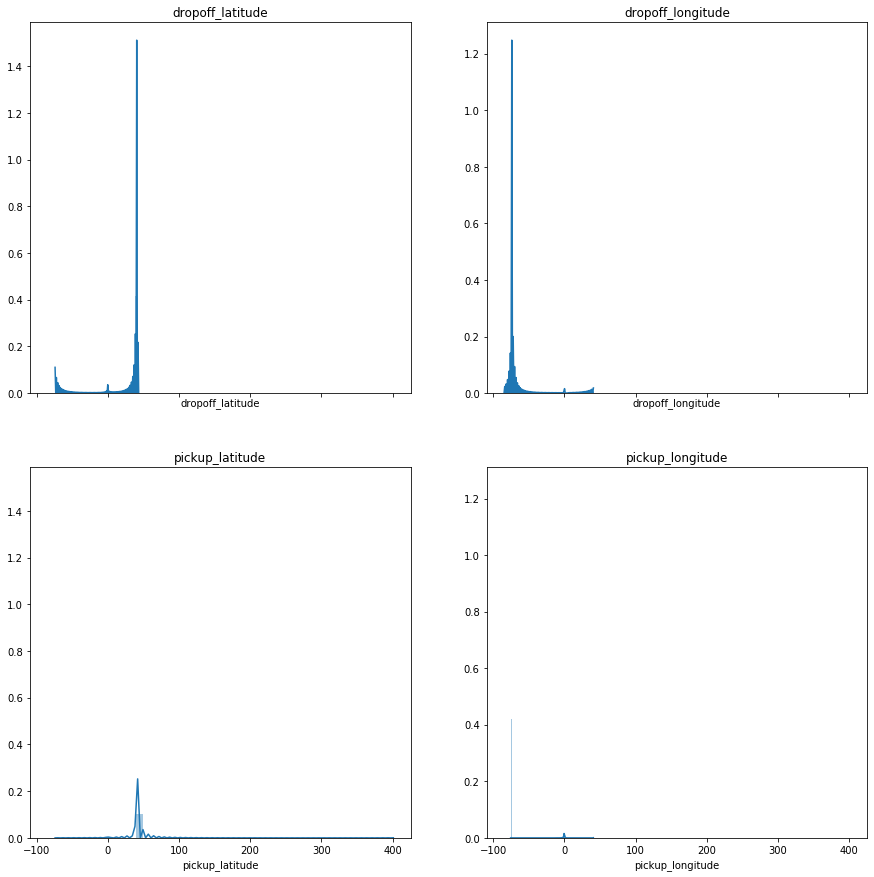

In [338]:
colors = ['coral', 'blue', 'green', 'purple']
a = ['dropoff_latitude','dropoff_longitude','pickup_latitude','pickup_longitude']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15), sharey='col', sharex=True)
for a, ax, color in zip(a, axes.flatten(), colors): 
    print(a)
    sns.distplot(data[a], ax=ax).set_title(str(a))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20914190>,
      dtype=object)

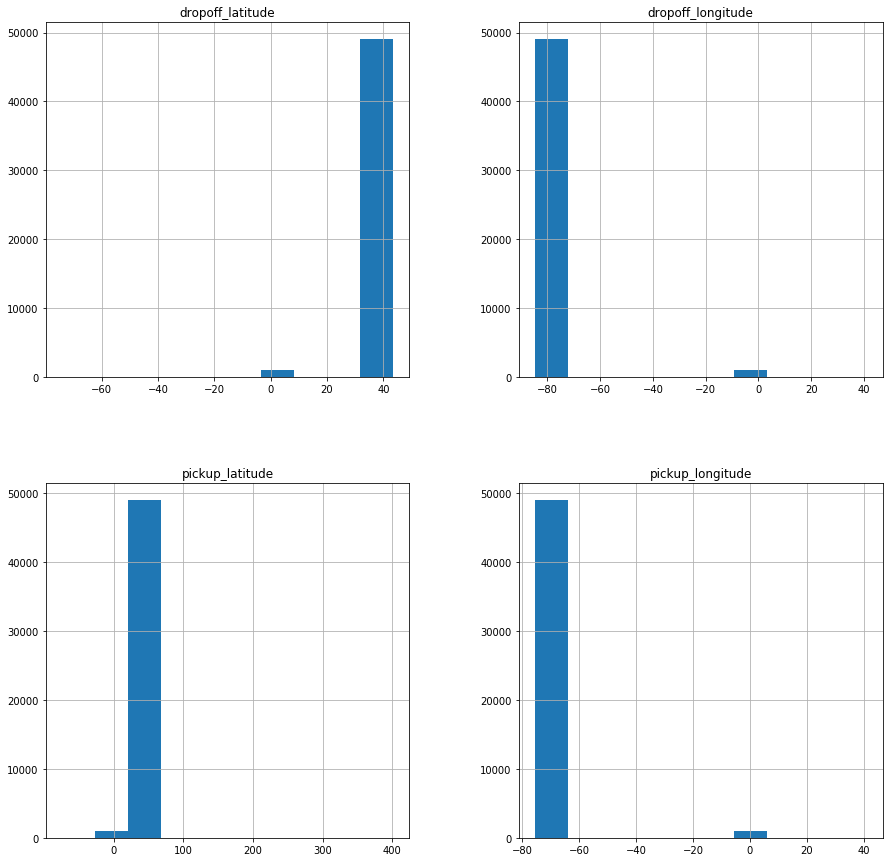

In [343]:
data[['dropoff_latitude','dropoff_longitude', 
                         'pickup_latitude','pickup_longitude']].hist(figsize=(15, 15))

In [272]:
перевод в радианы
np.radians(data['pickup_latitude']).iloc[0]

0.7107210923049249